In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from google.colab import drive
# drive.mount('/content/drive')
from sklearn.linear_model import LogisticRegression
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
import itertools
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from scipy import stats
from imblearn.over_sampling import SMOTE


In [2]:
df = pd.read_excel("data/df_balanced_noDups.xlsx")
X = df.drop(columns=['target_class'])
y= df['target_class']

In [3]:
df.isna().sum()
df.columns

Index(['Unnamed: 0', ' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [4]:
mean_excess_kurtosis = df[' Excess kurtosis of the integrated profile'].mean()
mean_std_dnsnr = df[' Standard deviation of the DM-SNR curve'].mean()
mean_skewness = df[' Skewness of the integrated profile'].mean()

In [5]:
df[" Excess kurtosis of the integrated profile"].fillna(mean_excess_kurtosis,inplace=True)
df[' Standard deviation of the DM-SNR curve'].fillna(mean_std_dnsnr, inplace=True)
df[' Skewness of the DM-SNR curve'].fillna(mean_skewness, inplace=True)

In [6]:
df.isna().sum()

Unnamed: 0                                       0
 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [7]:
smote = SMOTE(sampling_strategy='minority')

In [8]:
X = df.drop(columns=['target_class'])
y= df['target_class']
x_sm, y_sm = smote.fit_resample(X, y)
df_smote = pd.concat([pd.DataFrame(x_sm), pd.DataFrame(y_sm)], axis=1)
df_smote.columns = df.columns

df_smote['target_class'].value_counts()

target_class
0    23262
1    23262
Name: count, dtype: int64

In [9]:
df_smote.drop_duplicates(inplace=True)
df_smote['target_class'].value_counts()

target_class
0    23262
1    23262
Name: count, dtype: int64

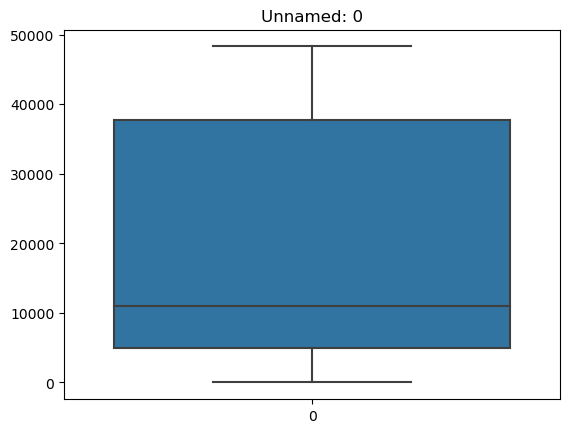

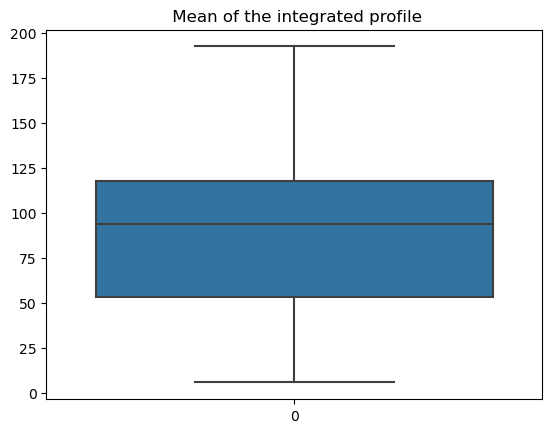

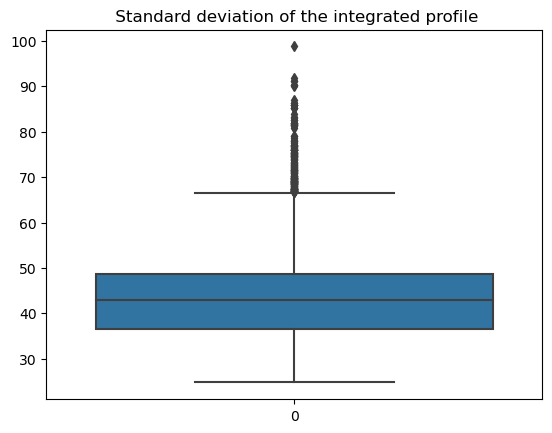

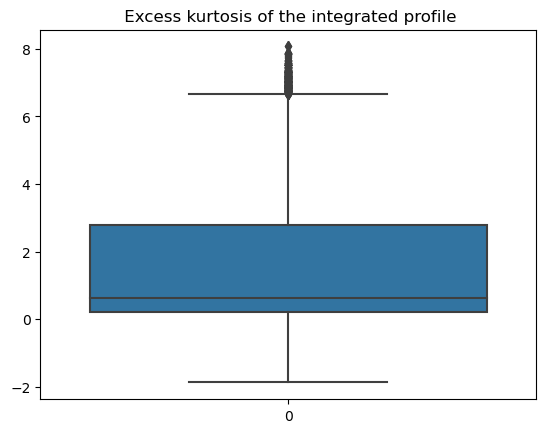

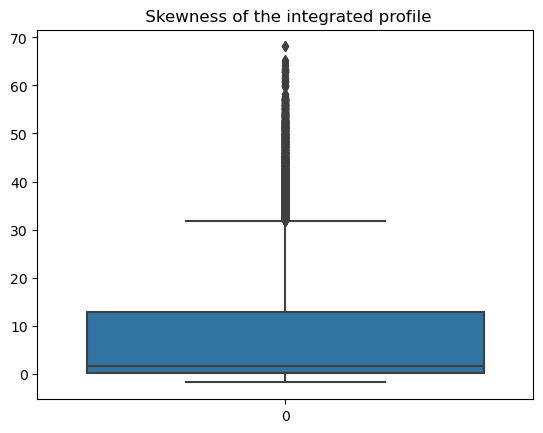

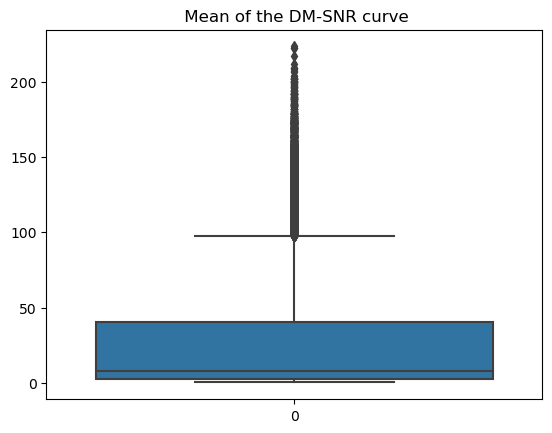

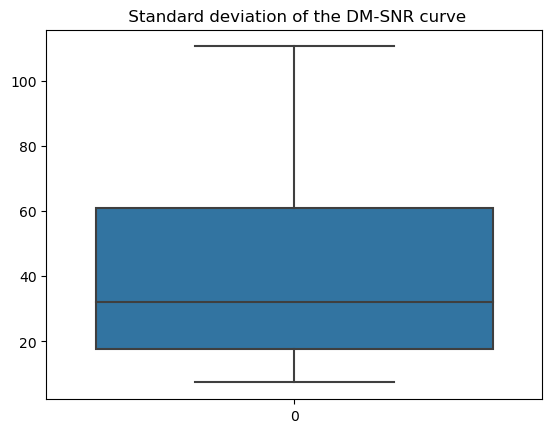

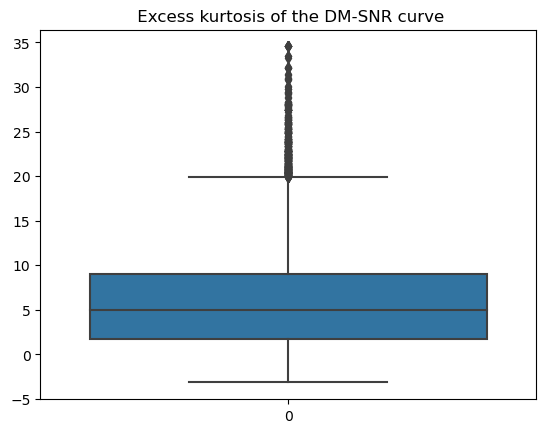

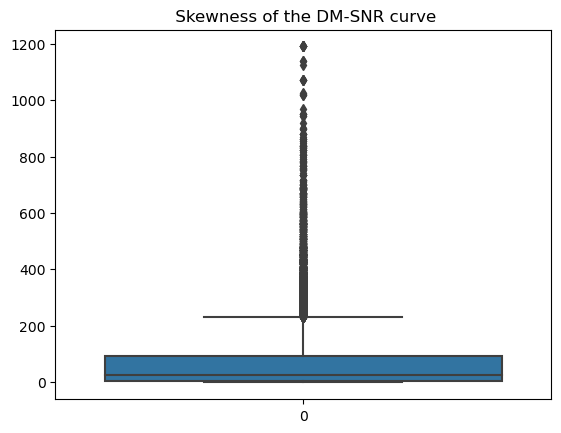

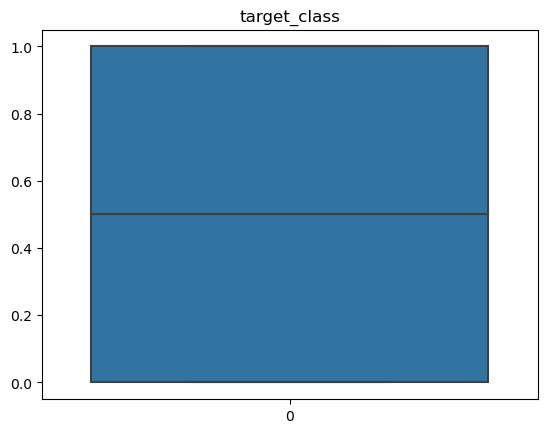

In [10]:
import seaborn as sns

numerical_columns = df_smote.select_dtypes(include=['float64', 'int64'])

for i in numerical_columns.columns:
    sns.boxplot(df_smote[i])
    plt.title(i)
    plt.show()

In [11]:
outlier_count = 0
outlying_columns = []

for i in numerical_columns.columns:
    column_outlier_count = 0
    Q1 = df_smote[i].quantile(0.25)
    Q3 = df_smote[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    column_outlier_count = column_outlier_count + df_smote[(df_smote[i] < lower_bound) | (df_smote[i] > upper_bound)].shape[0]
    outlier_count = outlier_count + column_outlier_count

    if outlier_count > 0:
        outlying_columns.append(i)
    print(i, column_outlier_count)
    print("---------------------------------------------")
print("********************************************")
print(outlier_count)


Unnamed: 0 0
---------------------------------------------
 Mean of the integrated profile 0
---------------------------------------------
 Standard deviation of the integrated profile 185
---------------------------------------------
 Excess kurtosis of the integrated profile 391
---------------------------------------------
 Skewness of the integrated profile 3053
---------------------------------------------
 Mean of the DM-SNR curve 4291
---------------------------------------------
 Standard deviation of the DM-SNR curve 0
---------------------------------------------
 Excess kurtosis of the DM-SNR curve 407
---------------------------------------------
 Skewness of the DM-SNR curve 2380
---------------------------------------------
target_class 0
---------------------------------------------
********************************************
10707


### Random forest model

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.2, random_state=42)

clf= RandomForestClassifier(max_depth=2, random_state=1)
clf.fit(x_sm, y_sm)

RandomForestClassifier(max_depth=2, random_state=1)

In [17]:
predictions = clf.predict(x_test)
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
print(clf.feature_importances_)

0.9473401397098334
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      4664
           1       0.98      0.91      0.95      4641

    accuracy                           0.95      9305
   macro avg       0.95      0.95      0.95      9305
weighted avg       0.95      0.95      0.95      9305

[0.         0.20560799 0.00222852 0.34014726 0.25386711 0.07671843
 0.07029261 0.02495378 0.02618429]


### Logistic regression model

In [19]:
LR = LogisticRegression(max_iter=100, random_state=42, solver='liblinear', C=0.1, penalty='l1', tol=0.0001, verbose=1, n_jobs=-1, l1_ratio=0.5)

LR.fit(x_train, y_train)

C:\Users\moham\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\moham\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[LibLinear]

LogisticRegression(C=0.1, l1_ratio=0.5, n_jobs=-1, penalty='l1',
                   random_state=42, solver='liblinear', verbose=1)

In [22]:
LR.predict(x_test)
print(accuracy_score(y_test, LR.predict(x_test)))
print(classification_report(y_test, LR.predict(x_test)))
print(confusion_matrix(y_test, LR.predict(x_test)))

0.953573347662547
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      4664
           1       0.98      0.93      0.95      4641

    accuracy                           0.95      9305
   macro avg       0.95      0.95      0.95      9305
weighted avg       0.95      0.95      0.95      9305

[[4563  101]
 [ 331 4310]]
